# Problem description

The Final Project will be
to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company and need to know whether the company is in near-term danger of not being able to repay.

This assignment will be a "warm up" exercise in advance of the Final Project.
We will guide you through some data transformation and Exploratory Data Analysis as a way
of inspiring the steps that you will undertake on your own for the Final Project.


## Goal

In previous assignments we provided code that tamed the problem of unruly data, in order to allow you to focus on the *other* steps in the Recipe.  There was also little Exploratory Data Analysis.

This assignment will require you to deal with data issues.  It will also make some "suggestions" for
exploring the data.



## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


In [2]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%reload_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# API for students

We have defined some utility routines in a file `bankruptcy_helper.py`. There is a class named `Helper` in it.  

This will simplify problem solving


`helper = bankruptcy_helper.Helper()`



- getData: get the training data and holdout data
  > `train, holdout = getData()`

- plot_attr: Create multiple plots of the distribution of the feature named `attr`, each plot conditioned on a possible value of target/label `y`
  >`helper.plot_attr(X, y, attr, trunc)`       

  > `X`: DataFrame of features. Each row is an example          
  > `y`: DataFrame/ndarray. Label of each example.,      
  > `attr`: string.  Name of feature whose distribution will be plotted      
  > `trunc`: Scalar. Optional parameter to truncate distribution at a threshold percentage.




# Get the data

The first step in our Recipe is Get the Data. 

There are two datasets in this assignment, which are stored in two different directories.

- The training data (examples consisting of feature vector/label pairs)
    - Stored in the file `train/data.csv`
- Holdout data (examples consisting of feature vectors **without** labels)
    - Stored in the file `holdout/data.csv`
    - Only the instructors have the labels.
    - We will evaluate your model performance on this dataset.

For the training data
- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt`, the label, is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

The holdout data is identical to the training data with the exception of the absence of `Bankrupt`

In [3]:
# Get the data
#  data: training dataset
#  holdout: hold out dataset without targets
data, holdout = helper.getData()

target_attr = "Bankrupt" # target attribute in training data, 1 for bankrupt and 0 for not bankrupt

n_samples, n_attrs = data.shape
print("Data shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [4]:
# training data
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


In [5]:
# holdout data
holdout.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Id
0,0.20839,0.26185,0.41039,2.5692,69.704,0,0.20839,2.819,1.641,0.73815,...,0.193390,0.28231,0.81043,0,52.04,4.6463,58.171,6.2747,5.0017,699
1,-0.19877,0.9368,-0.15579,0.83309,-57.414,0,-0.19877,0.067309,0.93406,0.063054,...,-0.159470,-3.1524,1.20510,0,56.348,1.3163,364.730,1.0007,4.202,539
2,0.35741,0.57153,0.34081,1.5991,4.4819,0,0.35741,0.74968,2.6993,0.42847,...,0.160800,0.83415,0.86775,0,8.6285,7.8131,76.926,4.7448,29.896,867
3,0.024312,0.45219,0.011469,1.0393,-831.06,0.006914,0.031273,1.2114,0.88188,0.54781,...,0.193770,0.044381,0.82091,0.29244,21.306,3.4388,120.850,3.0202,1.2661,595
4,0.075494,0.088948,0.56492,7.6065,74.299,0,0.10304,10.243,2.1253,0.91105,...,0.037832,0.082864,0.95227,0,15.437,8.391,14.685,24.855,6.0797,632


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
X1          4818 non-null object
X2          4818 non-null object
X3          4818 non-null object
X4          4818 non-null object
X5          4818 non-null object
X6          4818 non-null object
X7          4818 non-null object
X8          4818 non-null object
X9          4818 non-null float64
X10         4818 non-null object
X11         4818 non-null object
X12         4818 non-null object
X13         4818 non-null float64
X14         4818 non-null object
X15         4818 non-null object
X16         4818 non-null object
X17         4818 non-null object
X18         4818 non-null object
X19         4818 non-null float64
X20         4818 non-null float64
X21         4818 non-null object
X22         4818 non-null object
X23         4818 non-null float64
X24         4818 non-null object
X25         4818 non-null object
X26         4818 non-null object
X27         4818 non-null obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float` or `int`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So we will first have to convert all attributes to numeric

**Question:**

Create an all-numeric version of the data.  Assign it to the variable `data` (replacing the original)

**Hint:**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

In [7]:
### BEGIN SOLUTION
non_numeric_cols = data.select_dtypes(exclude=['float', 'int']).columns
data[ non_numeric_cols] = data[ non_numeric_cols ].apply(pd.to_numeric, downcast='float', errors='coerce')
### END SOLUTION

In [8]:
### BEGIN HIDDEN TESTS
assert 'object' not in data.dtypes
### END HIDDEN TESTS

Let's look at the data again, now that it is numeric

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
X1          4816 non-null float32
X2          4816 non-null float32
X3          4816 non-null float32
X4          4803 non-null float32
X5          4808 non-null float32
X6          4816 non-null float32
X7          4816 non-null float32
X8          4804 non-null float32
X9          4818 non-null float64
X10         4816 non-null float32
X11         4816 non-null float32
X12         4803 non-null float32
X13         4818 non-null float64
X14         4816 non-null float32
X15         4812 non-null float32
X16         4804 non-null float32
X17         4804 non-null float32
X18         4816 non-null float32
X19         4818 non-null float64
X20         4818 non-null float64
X21         4744 non-null float32
X22         4816 non-null float32
X23         4818 non-null float64
X24         4702 non-null float32
X25         4816 non-null float32
X26         4804 non-null float32
X27      

Hopefully you will see that all the attributes are now numeric.

Surprise ! Looks like there are some examples with undefined values for some features !
- Why didn't we see this when the data was not encoded as numbers ?



**Question:**

List all the attributes of `data` that are missing from at least one example.
- Set list `attrs_missing` to either a list or array of attributes that are missing from at least one example.

In [10]:
# Set variable
#  attrs_missing: list or array, attributes that are missing from at least one example
attrs_missing = None

### BEGIN SOLUTION
num_examples = data.shape[0]
num_examples_undefined = data.isnull().sum(axis=0)
attrs_missing = num_examples_undefined[ num_examples_undefined > 0 ].index.tolist()
### END SOLUTION

print("Attributes with values missing for at least some examples\t:\n\t" + "\n\t".join(attrs_missing))

Attributes with values missing for at least some examples	:
	X1
	X2
	X3
	X4
	X5
	X6
	X7
	X8
	X10
	X11
	X12
	X14
	X15
	X16
	X17
	X18
	X21
	X22
	X24
	X25
	X26
	X27
	X28
	X29
	X32
	X33
	X34
	X35
	X36
	X37
	X38
	X40
	X41
	X45
	X46
	X47
	X48
	X50
	X51
	X52
	X53
	X54
	X57
	X59
	X60
	X61
	X63
	X64


In [11]:
### BEGIN HIDDEN TESTS
tmp = np.sum(data.isna())
attrs_missing_test = tmp[tmp>0].index.tolist()
assert set(attrs_missing_test) == set(attrs_missing)
### END HIDDEN TESTS

So it looks like you will have to deal with missing data at some point.

We won't do this just now; you will need to address the issue yourself later.

But you will hopefully see that our target (`Bankrupt`) is not missing in any example

In [12]:
# Check if you target is missing any example
assert( not target_attr in set(attrs_missing) )

The label/target is included in this dataset
- It is the attribute `Bankrupt`
- Let's separate it from the feature attributes so we don't accidentally train the model with a feature that **is** the target !

In [13]:
data, labels = data.drop(columns=[target_attr]), data[target_attr]
print("Data shape: ", data.shape)

Data shape:  (4818, 65)


We will shuffle the examples before doing anything else.

In [14]:
# Shuffle the data first
data, labels = sklearn.utils.shuffle(data, labels, random_state=42)

print("Labels shape: ", labels.shape)
print("Label values: ", np.unique(labels))


Labels shape:  (4818,)
Label values:  [0 1]


## Create a test set 

To train and evaluate a model, we need to split the original dataset into
a training subset (in-sample) and a test subset (out of sample).

Although **the instructors** are the only ones with the holdout dataset, you probably want
to perform out of sample evaluation of your model.
So please create a test data set.

**Question:**

Split the data 
- Set 
    - `X_train`: training examples
    - `y_train`: labels of the training examples
    - `X_test`: test examples
    - `y_test`: labels of test examples
- 90% will be used for training the model
- 10% will be used as validation (out of sample) examples
- Use `train_test_split()` from `sklearn` to perform this split
    -  Set the `random_state` parameter of `train_test_split()` to be 42


In [15]:
# Split data into train and test
# Create variables X_train, X_test, y_train, y_test
#   X_train: training examples
#   y_train: labels of the training examples
#   X_test:  test examples
#   y_test:  labels of test examples
X_train = None
X_test = None
y_train = None
y_test = None

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10, random_state=42)
### END SOLUTION

print('X_train shape: ', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape:  (4336, 65)
X_test shape: (482, 65)


In [16]:
### BEGIN HIDDEN TESTS
X_train_, X_test_, y_train_, y_test_ = train_test_split(data, labels, test_size=0.10, random_state=42)
assert np.allclose(X_train_, X_train, equal_nan=True)
assert np.allclose(y_train_, y_train, equal_nan=True)
### END HIDDEN TESTS

# Exploratory Data Analysis

You may want to analyze potential relationships
- Between features and the target
- Between pairs/groups of features

We'll make some suggestions but, ultimately it is up to you.

**Warning**

We will perform *our* exploration using the **raw** data
- Thus, there may be features with missing values
- This may affect your analysis
- For example: how is the correlation of 2 features computed when there are missing values ?
- For the purpose of answering the questions in *this exercise*: leave the missing values in place
- For *your Final Project*: feel free to deal with missing features before doing Exploratory Data Analysis

**Remember**

- Base your analysis on `X_train`, don't peek at your out of sample data !


## Features correlated with the target

**Question:**

List the 5 features whose correlation with the target are largest (most positive).


- Set variable `corr_features`
    - To be a list or array with the names (e.g., `X3`) of the 5 features
    - Most highly correlated with `Bankrupt`
    - In *descending order*

**Hint:**
- Look up the Pandas `corr` method
- Look up the Pandas `sort_values`

In [17]:
# Set variable
#  corr_features: list or array, 5 features whose correlations with target are largest
corr_features = None

### BEGIN SOLUTION

# Put target back with data to facilitate correlation
df = X_train.copy()
df[ target_attr ] = y_train
corr_matrix = df.corr()

target_corr = corr_matrix['Bankrupt'].sort_values(ascending = False)
corr_features = target_corr.index[ 1:6 ].tolist()

### END SOLUTION

print("Features most correlated with target: ", corr_features)

Features most correlated with target:  ['X2', 'X51', 'X32', 'X9', 'X36']


In [18]:
### BEGIN HIDDEN TESTS
df_test = X_train.copy()
df_test[ target_attr ] = y_train
corr_matrix_test = df_test.corr()

target_corr_test = corr_matrix_test['Bankrupt'].sort_values(ascending = False)
corr_features_test = target_corr_test.index[ 1:6 ].tolist()

assert list(corr_features) == corr_features_test
### END HIDDEN TESTS

## Mutually correlated features

When you have a lot of features, you might discover that some of them convey little information
- Pairs of highly correlated features: a redundant feature conveys little additional information
- A small number of features that adequately represent the whole
    - In the Unsupervised Learning lecture, we will learn about PCA, a way to discover a small set of synthetic features that capture the whole

**Questions:**

- List the 5 features whose correlations with feature `X1` are largest (most positive).
    - Set variable `X1_corr_p`
        - To be a list or array with the names (e.g., `X3`) of the 5 features
        - Most highly correlated
        - In *descending order*
    
- List the 5 features whose correlations with feature `X1` are *most negative*.
    - Set variable `X1_corr_n`
        - To be a list or array with the names (e.g., `X3`) of the 5 features
        - Most highly *negatively* correlated
        - In *ascending order* (most negative first)

In [19]:
# Set varaibels
#  X1_corr_p: list or array, 5 features whose correlations with target are most positive
#  X1_corr_n: list or array, 5 features whose correlations with target are most negative
X1_corr_p = None
X1_corr_n = None

### BEGIN SOLUTION
# Put target back with data to facilitate correlation
df = X_train.copy()
df[ target_attr ] = y_train
corr_matrix = df.corr()

X1_corr = corr_matrix['X1'].sort_values(ascending = False)

X1_corr_p = X1_corr.index[ 1: 6].tolist()
X1_corr_n = X1_corr.index[ -1: - 6 : -1 ].tolist()
### END SOLUTION

print("Features most positively correlated with X1", X1_corr_p)
print("Features most negatively correlated with X1", X1_corr_n)

Features most positively correlated with X1 ['X7', 'X14', 'X11', 'X22', 'X35']
Features most negatively correlated with X1 ['X36', 'X38', 'X10', 'X25', 'X53']


In [20]:
### BEGIN HIDDEN TESTS
X1_corr_test = corr_matrix_test['X1'].sort_values(ascending = False)

X1_corr_p_test = X1_corr_test.index[ 1: 6].tolist()
X1_corr_n_test = X1_corr_test.index[ -1: - 6 : -1 ].tolist()

assert X1_corr_p_test == list(X1_corr_p)
assert X1_corr_n_test == list(X1_corr_n)
### END HIDDEN TESTS

One thing to consider (we saw something similar in the lecture topic on Influential Points)
- Outliers (feature values that are at the extremes of the distribution) can affect correlation

To illustrate:
- We will show the distribution of one feature, conditional on the value of the associated target value
- Here we overlay two distributions
    - The distribution of the feature value, conditioned on examples having target 0 (colored green)
    - The distribution of the feature value, conditioned on examples having target 1 (colored red)
    - When the two distributions overlap: the color will be a blend



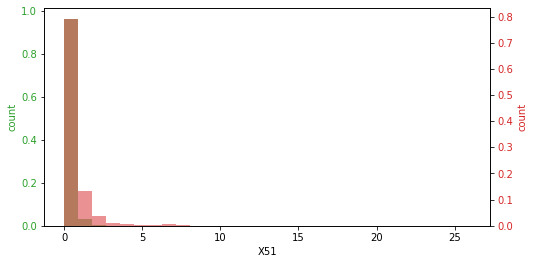

In [21]:
helper.plot_attr(X_train, y_train, "X51", trunc=0)

The above graph is not very informative
- The distributions overlap for the bins chosen
- But there seem to be many bins with very few values (i.e. X51 > 2)

But let's perform the same plot while *eliminating* extreme values of the feature
- Eliminate examples with the value of the feature in the upper and lower 1 percentile

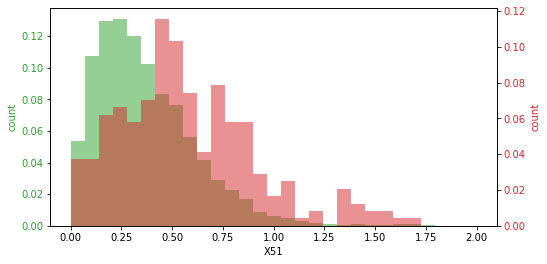

In [22]:
helper.plot_attr(X_train, y_train, "X51", trunc=.01)

We can now see that
- When the feature value is greater than 1.25
- The associated example indicates the company will go Bankrupt (`Bankrupt` = 1)

Just something to keep in mind in performing your own analysis and building your models
- Is there value in creating a synthetic feature: `X51 > t` for some threshold `t` ?

**Question:**

- Let `t = 1.1`
- Set variable `cond_frac_pos` to the fraction of examples that go Bankrupt where `X51 > t`
$$
\frac{ \text{count(Bankrupt == 1 and X51 > t} )} { \text{count(Bankrupt == 1)} }
$$

- Set variable `cond_frac_neg` to the fraction of examples that *do not* go Bankrupt where `X51 > t`
$$
\frac{ \text{count(Bankrupt == 0 and X51 > t} )} { \text{count(Bankrupt == 0)} }
$$


In [23]:
# Set variables
#  t: scalar number, threshold
#  cond_frac_pos: scalar number, fraction of examples that go bankrupt where X51 > t
#  Cond_frac_neg: scalar number, fraction of examples that do not go bankrupt where X51 > t
t = 1.1
cond_frac_pos = None
cond_frac_neg = None

### BEGIN SOLUTION
def cond_attr(df, attr, trunc=.01, thresh=1):
    X = df[attr]
    
    # Remove outliers, to improve clarity
    mask = (X > X.quantile(trunc)) & (X < X.quantile(1-trunc))
    X_trunc, y_trunc = X[ mask  ], y_train[ mask ]
    
    # Condition on value of target and thresh
    cp = X_trunc[ (y_trunc == 1) & (X_trunc > thresh) ].size/X_trunc[ y_trunc == 1].size
    cn = X_trunc[ (y_trunc == 0) & (X_trunc > thresh) ].size/X_trunc[ y_trunc == 0].size
      
    return cp, cn

attr = "X51"
trunc = 0
cond_frac_pos, cond_frac_neg = cond_attr(X_train, attr, trunc=trunc, thresh=t)
### END SOLUTION

print("The fraction of training examples that go Bankrupt, with ({attr:s} > {t:2.2f}) is {frac:3.1%}".format(attr=attr, 
                                                                                        t=t,
                                                                                        frac=cond_frac_pos)
     )

print("The fraction of training examples that DO NOT go Bankrupt, with ({attr:s} > {t:2.2f}) is {frac:3.1%}".format(attr=attr, 
                                                                                        t=t,
                                                                                        frac=cond_frac_neg)
     )


The fraction of training examples that go Bankrupt, with (X51 > 1.10) is 14.4%
The fraction of training examples that DO NOT go Bankrupt, with (X51 > 1.10) is 1.6%


In [24]:
### BEGIN HIDDEN TESTS
def cond_attr_test(df, attr, trunc=.01, thresh=1):
    X = df[attr]
    
    # Remove outliers, to improve clarity
    mask = (X > X.quantile(trunc)) & (X < X.quantile(1-trunc))
    X_trunc, y_trunc = X[ mask  ], y_train[ mask ]
    
    # Condition on value of target and thresh
    cp = X_trunc[ (y_trunc == 1) & (X_trunc > thresh) ].size/X_trunc[ y_trunc == 1].size
    cn = X_trunc[ (y_trunc == 0) & (X_trunc > thresh) ].size/X_trunc[ y_trunc == 0].size
      
    return cp, cn

cond_frac_pos_test, cond_frac_neg_test = cond_attr_test(X_train, 'X51', trunc=0, thresh=1.1)

assert np.allclose(cond_frac_pos_test, cond_frac_pos)
assert np.allclose(cond_frac_neg_test, cond_frac_neg)
### END HIDDEN TESTS

It seems that we can discover a large fraction of examples that go Bankrupt by examining 
one feature and threshold.

But using this alone will result in some number of False Positives (non Bankrupt examples)
- And although the percent is small, we will see that the non Bankrupt examples are more numerous

# Imbalanced data

We have a binary classification problem.

Do we have roughly the same number of examples associated with each of the two targets ?

**Question:**

How many training examples do we have that became Bankrupt ?
- Set variable `num_bankrupt` to this value

How many training examples do we have that *did not become* Bankrupt ?
- Set variable `num_nonbankrupt` to this value

In [25]:
# Set variables
#  num_examples: scalar number, number of examples in the training dataset
#  num_bankrupt: scalar number, number of examples that became bankrupt
#  num_nonbankrupt: scalar number, number of examples that did not become bankrupt
num_examples = X_train.shape[0]
num_bankrupt = None
num_nonbankrupt = None

### BEGIN SOLUTION
bankrupt = X_train[ y_train == 1 ] 
nonbankrupt = X_train[ y_train == 0 ]

num_bankrupt    = bankrupt.shape[0]
num_nonbankrupt = nonbankrupt.shape[0]

### END SOLUTION

print("Of the {t:d} total examples: {b:d} became bankrupt and {nb:d} did not become bankrupt".format(t=num_examples,
                                                                                                    b=num_bankrupt,
                                                                                                    nb=num_nonbankrupt)

     )

Of the 4336 total examples: 268 became bankrupt and 4068 did not become bankrupt


In [26]:
### BEGIN HIDDEN TESTS
bankrupt_test = X_train[ y_train == 1 ] 
nonbankrupt_test = X_train[ y_train == 0 ]

num_bankrupt_test = bankrupt_test.shape[0]
num_nonbankrupt_test = nonbankrupt_test.shape[0]

assert num_bankrupt == num_bankrupt_test
assert num_nonbankrupt == num_nonbankrupt_test
### END HIDDEN TESTS

This dataset is highly imbalanced: many more examples of one class than the other.

Why might this be a problem ?
    

Consider a naive model that ignores the features and always predicts the *most frequent* value of the target.

Assuming the out of sample data has the same distribution as the training data:
- We will have perfect conditional accuracy for the examples with target in the majority class
- We will have zero conditional accuracy for the examples with target in the non-majority class
- Because the number of examples in the majority class is so much larger:
    - We might get good unconditional accuracy

Recall our lecture on Recall and Precision.

These are metrics that will help us evaluate our model's ability to correctly predict Bankruptcy.

We think that you will find that your model may have
- High Accuracy
- Low Recall

There are several ways for you to deal with imbalanced data
- Class sensitive weights
    - Many models in `sklearn` take an optional argument `class_weight`
    - For each target class: you can assign a weight
    - The Loss will be computed on a class-weighted basis
    - You can choose weights that increase the influence of the non-majority class

Another way is re-sampling the training set
- Expand the number of training examples
- By increasing the number of examples of the non-majority class
    - Randomly sample examples in the non-majority class
    - So you will have duplicates
- This creates a more balanced dataset on which to train

These are just some ideas for you to achieve a model with better
conditional metrics.

## Now submit your assignment!

The above steps are an attempt to inspire your own transformations and Exploratory Data Analysis.

These will be critical steps in your Final Project, where you will need to build and evaluate your own model for the Classification task of predicting bankruptcy.

Please click on the blue button <span style="color: blue;"> **Submit** </span> in this notebook. 